In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

model_names = [
    'transformer',
    'resnet18',
    'resnet50'
    ]

# set this to be the same as the one in the experiment
model_idx = 2

model = model_names[model_idx]

data_file = f'out/{model}.csv'

df = pd.read_csv(data_file)
df.head()

,rank,name,op,target,all_input_nodes,users,size,runtime,type,mem_cuda,mem_cuda_pre,mem_cuda_peak,first_forward,last_forward,first_backward,last_backward
0,0,arg0_1,placeholder,arg0_1,[],"{convolution: None, convolution_backward_52: N...",37632.0,0.036181,NodeType.PARAM,319080960,319080960,319080960,convolution,convolution,convolution_backward_52,copy__1932
1,1,arg0_2,placeholder,arg0_2,[],"{cudnn_batch_norm: None, cudnn_batch_norm_back...",256.0,0.026624,NodeType.PARAM,319080960,319080960,319080960,cudnn_batch_norm,cudnn_batch_norm,cudnn_batch_norm_backward_52,copy__1933
2,2,arg0_3,placeholder,arg0_3,[],"{cudnn_batch_norm: None, _foreach_addcdiv: Non...",256.0,0.024917,NodeType.PARAM,319080960,319080960,319080960,cudnn_batch_norm,cudnn_batch_norm,_foreach_addcdiv,copy__1934
3,3,arg0_4,placeholder,arg0_4,[],"{convolution_1: None, convolution_backward_51:...",16384.0,0.024235,NodeType.PARAM,319080960,319080960,319080960,convolution_1,convolution_1,convolution_backward_51,copy__1935
4,4,arg0_5,placeholder,arg0_5,[],"{cudnn_batch_norm_1: None, cudnn_batch_norm_ba...",256.0,0.024235,NodeType.PARAM,319080960,319080960,319080960,cudnn_batch_norm_1,cudnn_batch_norm_1,cudnn_batch_norm_backward_51,copy__1936


In [56]:
# some preprocessing
df['mem_cuda_GB'] = df.mem_cuda * 1e-9
df['mem_cuda_pre_GB'] = df.mem_cuda_pre * 1e-9
df['mem_cuda_peak_GB'] = df.mem_cuda_peak * 1e-9

op_start = df[df.op == 'call_function']['rank'].min()
sep_rank = df[df.name == 'sep']['rank'].item()
sep_back_rank = df[df.name == 'sep_backward']['rank'].item()
opt_start = df[df.name == '_foreach_lerp_']['rank'].item()

print(op_start, sep_rank, sep_back_rank, opt_start)

df_grad = df[op_start:opt_start]

807 1256 1259 2033


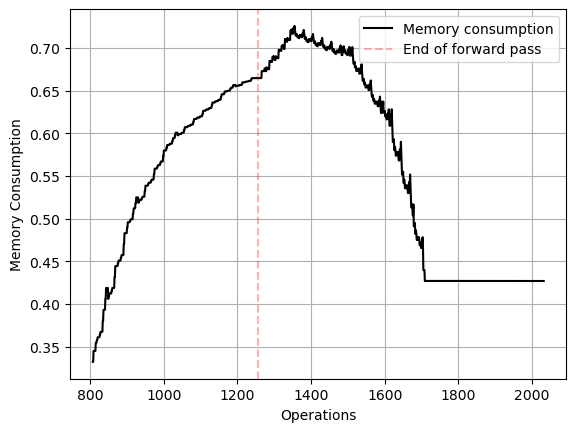

In [57]:
plt.grid()
plt.plot(df_grad.mem_cuda_GB, color = 'k', label='Memory consumption')

plt.xlabel('Operations')
plt.ylabel('Memory Consumption')

plt.axvline(sep_rank, color='r', linestyle='--', alpha=0.3, label='End of forward pass')
# plt.axvline(sep_back_rank, color='red', label = 'Begin of backward pass')
plt.legend()
plt.show()